In [23]:
import itchat
itchat.auto_login(hotReload = True)
friends = itchat.get_friends(update = True)

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 黄钦


In [6]:
sexes = [friend['Sex'] for friend in friends[1:]]

In [7]:
from collections import Counter
counts = [c[1] for c in Counter(sexes).items()]

In [7]:
import matplotlib.pyplot as plt

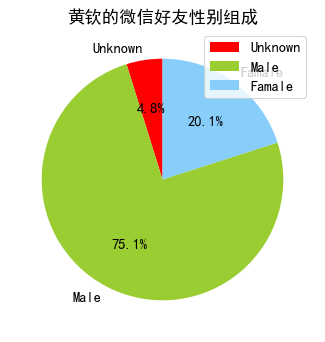

LOG OUT!


In [11]:
labels = ['Unknown', 'Male', 'Famale']
colors = ['red', 'yellowgreen', 'lightskyblue']
plt.figure(figsize=(8, 5), dpi = 80)
plt.rc('font', family='SimHei', size=13)
plt.axes(aspect = 1)
plt.pie(counts, labels = labels,
		colors = colors,
		labeldistance = 1.1,
		autopct = "%3.1f%%",
		shadow = False,
		startangle = 90, 
		pctdistance = 0.6)
plt.legend(loc = 'upper right')
plt.title(u'%s的微信好友性别组成' % friends[0]['NickName'])
plt.show()

In [24]:
import TencentYoutuyun
appid = '10122237'
secret_id = 'AKID77zhEbe8798xb5pWTJzVq11ykLl1rygH'
secret_key = 'ZxAD5nKzTmttiLn3EE2hBUcaP5bx8C8v'
userid = '250761123'
end_point = TencentYoutuyun.conf.API_YOUTU_END_POINT
youtu = TencentYoutuyun.YouTu(appid, secret_id, secret_key, userid, end_point)

In [27]:
import pandas as pd
df_friends = pd.DataFrame(friends)
df_friends.columns

Index(['Alias', 'AppAccountFlag', 'AttrStatus', 'ChatRoomId', 'City',
       'ContactFlag', 'DisplayName', 'EncryChatRoomId', 'HeadImgFlag',
       'HeadImgUrl', 'HideInputBarFlag', 'IsOwner', 'KeyWord', 'MemberCount',
       'MemberList', 'NickName', 'OwnerUin', 'PYInitial', 'PYQuanPin',
       'Province', 'RemarkName', 'RemarkPYInitial', 'RemarkPYQuanPin', 'Sex',
       'Signature', 'SnsFlag', 'StarFriend', 'Statues', 'Uin', 'UniFriend',
       'UserName', 'VerifyFlag', 'WebWxPluginSwitch'],
      dtype='object')

In [46]:

cj = friends[305]['UserName']
imgData = itchat.get_head_img(userName = cj)
with open(img_dir + 'cj.jpg', 'wb') as f:
    f.write(imgData)

In [37]:
img_dir = "./head_img/"
for index, friend in enumerate(friends):
    friend_name = friend['RemarkName'] if friend['RemarkName'] else friend['NickName']
    print("Getting head image of {}".format(friend_name))
    head_img_file = img_dir + friend_name + '.jpg'
    imgData = itchat.get_head_img(userName = friend['UserName'])
    with open(head_img_file, 'wb') as f:
        f.write(imgData)

''

In [45]:
[friend['RemarkName'] if friend['RemarkName'] else friend['NickName'] for friend in friends]

In [57]:
df_friends = pd.DataFrame(friends)
df_friends[df_friends.NickName == '陈佳'].UserName

305    @017c0ec701ce0eec4a5a9b6d8780f96c66d04c479eafe...
Name: UserName, dtype: object

In [90]:
from functools import reduce
tag = youtu.imagetag('cj.jpg')
tags = reduce(lambda x, y: x+y, [t['tag_name'] for t in tag['tags']])
img_tags = tags.encode('iso8859-1').decode('utf-8')


In [4]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

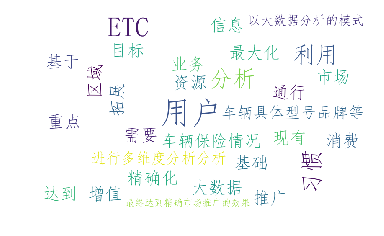

In [19]:
back_coloring = np.array(Image.open('round.jpg'))
wordcloud = WordCloud(
        font_path='simfang.ttf',
        background_color="white",
        max_words=1200,
        mask=None, 
        max_font_size=75,
        random_state=45,
        width=800, 
        height=480, 
        margin=15
    )

wordcloud.generate('基于,ETC,增值,业务,拓展,的,需要，为,分析,ETC,用户,消费,习惯，达到,精确化,市场,推广、最大化,利用,现有,用户,资源,的,目标，利用,ETC,用户,基础,信息,大数据，重点,分析,用户,习惯,通行,区域、车辆保险情况、车辆具体型号品牌等，进行多维度分析分析，以大数据分析的模式，最终达到精确市场推广的效果')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
wordcloud?